<img src="https://github.com/Center-for-Health-Data-Science/PythonTsunami/blob/spring2022/figures/HeaDS_logo_large_withTitle.png?raw=1" width="300">

<img src="https://github.com/Center-for-Health-Data-Science/PythonTsunami/blob/spring2022/figures/tsunami_logo.PNG?raw=1" width="600">

# Classification with decision trees

In this session we will build and investigate a decision tree for the diabetes data.

First, we as usual import some libraries and load the data we have cleaned during EDA:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#using pandas csv reader to load data from our github repo
link_to_file = "https://raw.githubusercontent.com/Center-for-Health-Data-Science/Python_part2/main/data/diabetes.csv"

db_df = pd.read_csv(link_to_file)
db_df.head()

,ID,Age,Sex,BloodPressure,GeneticRisk,BMI,PhysicalActivity,Married,Work,Smoker,Diabetes
0,9046,34,Male,84,0.619,24.7,93,Yes,Self-employed,Unknown,0
1,51676,25,Male,74,0.591,22.5,102,No,Public,Unknown,0
2,31112,30,Male,0,0.839,32.3,75,Yes,Private,Former,1
3,60182,50,Male,80,0.178,34.5,98,Yes,Self-employed,Unknown,1
4,1665,27,Female,60,0.206,26.3,82,Yes,Private,Never,0


If you don't have the cleaned file or have trouble uploading it you can use the version from our github:

In [ ]:
#@title Load the file from github instead

link_to_file = "https://raw.githubusercontent.com/Center-for-Health-Data-Science/Python_part2/main/data/diabetes_clean.csv"
db_df = pd.read_csv(link_to_file)
print(db_df.shape)
db_df.head()

## Picking out some features

In this notebook we are principally interested in understanding:

*   How to initialize and fit a a decision tree
*   How the tree works:
    *   What is a split?
    *   How does the model decide which split to use? (criterion)
    *   How do samples progress through the tree from the root to one of the leaves?


We will therefore make a small tree where we are better able to keep the overview and follow what is happening. For this, we will pick 3 features to make the tree on, instead of using all features. You will later during the exercise make trees with different or more features and compare.


So here we have our features (the X) which will be physical activity, genetic risk score and blood pressure.

In [ ]:
#we use the loc operator to subset the dataframe, then append .to_numpy()  to convert the output into a numpy array in one line
subset_X = db_df.loc[:,['PhysicalActivity', 'GeneticRisk', 'BloodPressure']].to_numpy()
#showing the first 5 lines
subset_X[:5]

array([[ 93.   ,   0.619,  84.   ],
       [102.   ,   0.591,  74.   ],
       [ 75.   ,   0.839,   0.   ],
       [ 98.   ,   0.178,  80.   ],
       [ 82.   ,   0.206,  60.   ]])

And here we have the outcome y, whether or not the person has Diabetes.

In [ ]:
y = db_df['Diabetes'].to_numpy()
y[:5]

array([0, 0, 1, 1, 0])

## Split in Test and training set

As before, we will fit our model on a part of the data set and use the rest to evaluate model performance by comparing our predictions to the actual observed outcome.

## Exercise 1 (5 mins)

Split the data into training and test set, like we [did during linear regression](https://colab.research.google.com/drive/1SazExQFevF30mnzkL1c7FE5Jda-igFZ6#scrollTo=ZQdbS1jsSKt9). We will use 25% of the data for the test set. Remember to import the necessary method from `sklearn`

You'll make more models with different features later, so in order to be more comparable use `random_state=123`. This ensures that we always get the same rows assigned to the training and test set.

Confirm the shape and the content of the arrays you have produced.

In [ ]:
#import the function to produce the training and test sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    subset_X, y, test_size=0.33, random_state=42)

## Defining and fitting the tree

Alright, now we are ready to initialize the tree model.

As said before, we will aim to make a small tree so we'll set the maximum number of leaf nodes to 6.

<img src="https://github.com/Center-for-Health-Data-Science/Python_part2/blob/main/teachers/figures/decision_tree_annotated.PNG?raw=1" width="600">


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_leaf_nodes=6)

In [ ]:
tree_model

DecisionTreeClassifier(max_leaf_nodes=6)

The tree model we just created is an object, just like our linear regression model was. Do you remember what we need to do to fit the model with our training data?

In [ ]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=6)

Now that we have a trained model object, we can investigate its attributes.

There are a lot of hyperparameters which define how the model is set up. We've only changed one, `max_leaf_nodes`. The rest is at their default values.

In [ ]:
vars(tree_model)

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': 6,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'n_features_in_': 3,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 3,
 'tree_': <sklearn.tree._tree.Tree at 0x7af8a5e551b0>}

We also see some trainable parameters, ending in an underscore `_`.

We can see how many features we put in (3), how many classes there are (2) and we get a `tree_` object that contains the anatomy of the tree.

We'll use a cool function called `plot_tree` to visualize it!

In [ ]:
from sklearn.tree import plot_tree

`plot_tree` makes a call to matplot_lib, the fundamental python plotting library. Therefore we'll include a `plt.show()` call to make it show us the plot.

We don't need that in seaborn, since in seaborn the `plt.show()` call is implicit, but we could do it anyway.

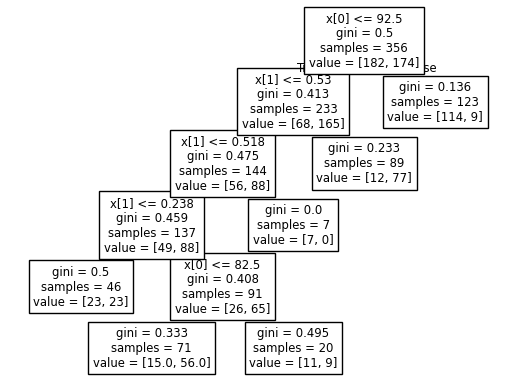

In [ ]:
plot_tree(tree_model)
plt.show()

Alright, we see a tree!

Just as we asked, it has 6 leaf nodes which are the end points. It also has 4 decision nodes and a root node where the checks are made.

The first check is whether the feature in column 0 is smaller or equal to 92.5 .

Let's add some more parameters to our tree plot to make it more easy to read.

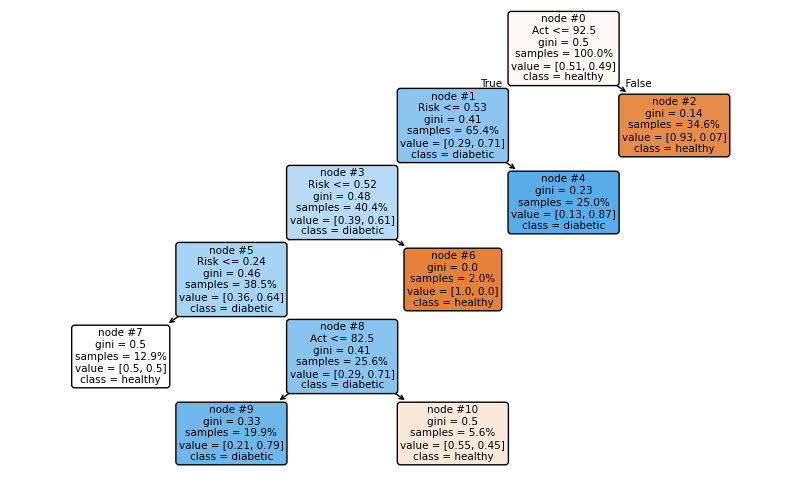

In [ ]:
#define the canvas size so we get a bigger plot
plt.figure(figsize=(10,6))

plot_tree(tree_model,
          #the names of the input features, in the order of the columns in X_train
          feature_names=['Act','Risk','BP'],
          #show percentage of samples instead of numbers
          proportion=True,
          #color nodes by purity
          filled=True,
          #the names of the classes
          class_names=['healthy','diabetic'],
          #how many digits after the dot to show
          precision=2,
          #cute rounded nodes
          rounded=True,
          node_ids=True)
plt.show()

Using `proportions=True` shows us which percentage of the samples arrives in a certain node, which is more easy to interpret than the actual sample number.

All samples pass through the root node #0 and this is where the first split is performed. It is on whether the value of the physical activity feature is <= 92.5 or not. Samples, i.e. people, with an activity value lower than that are directed to node #1 on the left. Those are 67.5% of the samples. Conversely, samples with an activity level higher than 92.5 are directed to node # 2 on the right and these are 32.5% of samples. So in this visualization, if the check returns `True` a sample goes right, if it returns `False` the sample goes left.  

We can follow the samples through further decision nodes until we hit a leaf. At every decision node, the pool of samples that arrives to the node is split into two depending on whether the result of the check is True or False.

When we arrive to a leaf node, the majority class in this node is the class label that will be predicted. They are not always pure. For example, in leaf node #9 24% of samples are from class 0 (healthy), and 76% of samples are from class 1 (diabetic). You can see these numbers from the `value` printed in the node. The percentages, 24% and 76% refers to the training set which we used to fit the model.

## Exercise 2 (5 mins)

Discuss in your group what you think about the splits being picked. Do you agree or disagree? Why is the blood pressure variable never picked?

## How splits are picked

So how does the model decide which check is performed at each node? Why look at physical activity and not at the risk score, and how does it pick the cutoff value of 92.5?

During training, the model examines many possible splits and the best one is picked. We can hopefully agree that the 'best' split is the one that creates the most separation between classes. Ideally, only samples from class 0 would return `True` for the check and only samples from class 1 would return `False` (or the other way around). There are different ways to mathematically measure the goodness of split and the ones implemented in scikit-learn are:

* Gini impurity (`gini`)
* the log loss of the Shannon information criterion (`log_loss`)
* the entropy of the Shannon information criterion (`entropy`)

The default criterion is the Gini impurity and this is also what is shown in the plot of the tree we have built.

## Exercise 3 (10 mins)

Initialize a second tree model where you use the **entropy** as the criterion instead of the Gini impurity. Keep the maximum number of leaf nodes at 6. Train the model with the same data we used before and plot the resulting tree. You can experiment with the figure size to get a clearer plot where the arrows are easily visible. Compare it to our first tree and discuss what you see.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    subset_X, y, test_size=0.33, random_state=42)

In [ ]:
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Gini-based tree
tree_gini = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=6, random_state=42)
tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=6, random_state=42)

In [ ]:
# Entropy-based tree
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6, random_state=42)
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6, random_state=42)

NameError: name 'X' is not defined

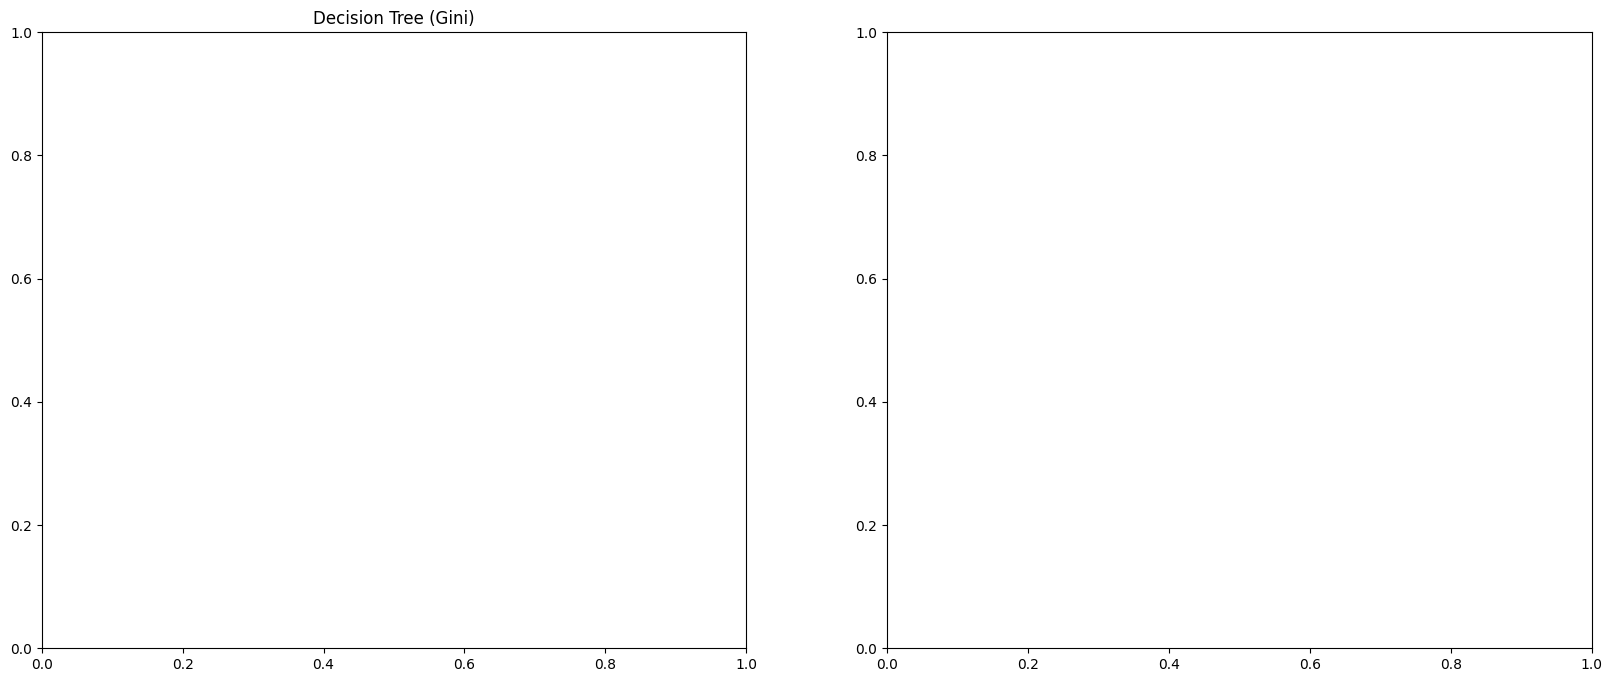

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set up side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Gini tree
axes[0].set_title("Decision Tree (Gini)")
plot_tree(tree_gini, feature_names=X.columns, class_names=True, filled=True, rounded=True, ax=axes[0])

# Entropy tree
axes[1].set_title("Decision Tree (Entropy)")
plot_tree(tree_entropy, feature_names=X.columns, class_names=True, filled=True, rounded=True, ax=axes[1])

plt.tight_layout()
plt.show()

## Evaluating performance of classifier models

In order to evaluate model performance, we need to apply our trained decision tree to our test data and see what labels it predicts and how they compare to the known true class (diabetic or not).

How do we predict?

In [ ]:
y_pred = tree_model.predict(X_test)

In [ ]:
print('predicted:')
print(y_pred[:10])
print(y_pred.shape, end = '\n\n')

print('true outcome:')
print(y_test[:10])
print(y_test.shape)

predicted:
[1 1 0 1 1 1 1 0 1 0]
(176,)

true outcome:
[1 1 0 1 1 1 1 0 1 0]
(176,)


Since we're getting labels from the decision tree, we will look at a confusion matrix and calculate some scores such as precision, recall and accuracy.

In [ ]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#it's important that we tell the function which are our predictions and which are the true outcomes

pd.DataFrame(confusion_matrix(y_true = y_test,y_pred = y_pred),
             index=['Actual_0', 'Actual_1'],
             columns=['Pred_0','Pred_1'])

,Pred_0,Pred_1
Actual_0,73,12
Actual_1,25,66


So in our test data there are 68 people who are in class 0, which means they are healthy (0 == no diabetes). We get that number by summing up the 'Actual 0' row. And there are 54 people who are diabetic.

However, our model predicts only 48 of the true healthy as being healthy and the other 20 as being diabetic.

Now in order to calculate a precision and recall we need to decide which of our two classes, 0 and 1, is 'positive' and which is 'negative'. There can be arguments made for both, but lets say we are attempting to detect diabetic people in a pool of people so diabetics will be the 'positives' we're trying to idenfity.

Incidentally, that means our confusion matrix has its rows swapped compared to this one from the presentation:

<img src="https://github.com/Center-for-Health-Data-Science/Python_part2/blob/main/teachers/figures/conf_matrix.png?raw=1" width="400">


Intuitively, the precision is about which proportion of the identified 'cases', i.e. 'positives' are actually cases. Here it means, out of everyone we predict to be diabetic, how many people truly are?

In [ ]:
from sklearn.metrics import precision_score
round(precision_score(y_true = y_test,y_pred = y_pred, pos_label = 1),2)

0.85

And the recall. Intutively, the recall is about which proportion of the true 'cases', i.e. positive we have found.


In [ ]:
from sklearn.metrics import recall_score
round(recall_score(y_true = y_test,y_pred = y_pred, pos_label = 1),2)

0.73

## Exercise 4 (10 mins)

Create predictions for the entropy based tree you made in exercise 2.

Then calculate the confusion matrix, precision and recall and compare to our previous results.

In [ ]:
y_pred_entropy = tree_entropy.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))


Accuracy: 0.8295454545454546


In [ ]:
#Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_entropy))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80        85
           1       0.78      0.93      0.85        91

    accuracy                           0.83       176
   macro avg       0.85      0.83      0.83       176
weighted avg       0.84      0.83      0.83       176



In [ ]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))


Confusion Matrix:
[[61 24]
 [ 6 85]]


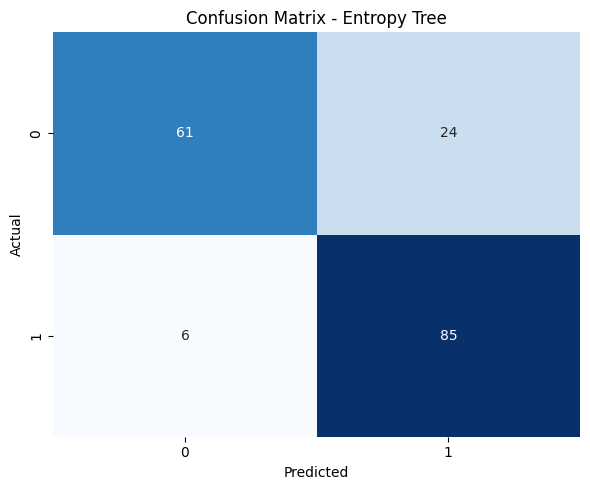

In [ ]:
# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred_entropy)

# Plot as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Entropy Tree')
plt.tight_layout()
plt.show()


## Feature Importance

The trained tree model has one more trainable parameter of interest to us: The feature importance. This is a representation of how important each feature, i.e. predictor variable, is for the prediction of the outcome.

It is not listed in `vars` because it is a **property**, but you can find it mentioned in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of the decision tree class.

Properties are a special kind of attribute that have `__get__`, `__set__` and `__delete__` methods which specfiy exactly what should happen, whereas usual attributes are manipulated directly. This will make more sense when we talk about user defined classes tomorrow. For now, you can address it like any other attribute with the dot syntax:

In [ ]:
tree_model.feature_importances_

array([0.87377212, 0.12622788, 0.        ])

In order to interpret these numbers, we need to remember which features we extracted from the original dataframe to make the tree:

```python
subset_X = db_df.loc[:,['PhysicalActivity', 'GeneticRisk', 'BloodPressure']].to_numpy()
```

So accordingly, the fitted model has estimated an importance for the physical activity variable of 0.87, for the genetic risk score of 0.13 and for the blood pressure of 0!

We are pleased with this result since, as far as we know, blood pressure should not influence the diabetes risk.

## Group Exercise part 1 (20 mins)

Starting from our original dataframe `db_df`, make a another decision tree model. Pick the features you want to include. You can also use all of them, except of course the `Diabetes` column since that is the outcome. Use `random_state=123` during the training and test split so you can compare your results to our previous models. Try some different hyperparameters (you can find them all explained in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) and build a nicely performing model.


In [4]:
#using pandas csv reader to load data from our github repo
link_to_file = "https://raw.githubusercontent.com/Center-for-Health-Data-Science/Python_part2/main/data/diabetes.csv"

db_df = pd.read_csv(link_to_file)
db_df.head()

,ID,Age,Sex,BloodPressure,GeneticRisk,BMI,PhysicalActivity,Married,Work,Smoker,Diabetes
0,9046,34,Male,84,0.619,24.7,93,Yes,Self-employed,Unknown,0
1,51676,25,Male,74,0.591,22.5,102,No,Public,Unknown,0
2,31112,30,Male,0,0.839,32.3,75,Yes,Private,Former,1
3,60182,50,Male,80,0.178,34.5,98,Yes,Self-employed,Unknown,1
4,1665,27,Female,60,0.206,26.3,82,Yes,Private,Never,0


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:
y = db_df['Diabetes']
X = db_df.drop(columns=['Diabetes'])

In [44]:
X = pd.get_dummies(X, drop_first=True)

In [36]:
#import the function to produce the training and test sets
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

In [51]:
# Try a tuned tree
tree_model = DecisionTreeClassifier(
    criterion='entropy',        # or 'gini'
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=123
)

In [52]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=4, random_state=123)

In [53]:
y_pred = tree_model.predict(X_test)

In [54]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9626168224299065

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.96      0.96      0.96        48

    accuracy                           0.96       107
   macro avg       0.96      0.96      0.96       107
weighted avg       0.96      0.96      0.96       107



## Group Exercise Part 2 (15 mins)


Now, intialize a new tree model with default parameters (no `max_leaf_nodes` or `criterion`). Train this model with the same data you used before and plot the resulting tree. You may discover that you benefit from a larger canvas. Save the figure in a pdf and download the pdf from the 'Files' tab on the right so you can view it on your computer and zoom in and out. We had a look at how to do that at the [end of the EDA lecture](https://colab.research.google.com/drive/18qJ5H66UPCYeQ58aRxcoPepJiEB6Qeh7#scrollTo=9R60lXWq0CQc).

Compare this model with your previous model from part 1. Is it a good model? Why or why not?

In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [71]:
# Step 1: Initialize the default decision tree (no hyperparameters)
default_tree = DecisionTreeClassifier(random_state=123)

In [72]:
# Step 2: Fit the model to the training data
default_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=123)

[Text(0.570853506455399, 0.9736842105263158, 'Insomnia <= 0.5\ngini = 0.796\nsamples = 200\nvalue = [34, 39, 40, 51, 36]\nclass = y[3]'),
 Text(0.24264598004694835, 0.9210526315789473, 'Avg_hours <= 6.05\ngini = 0.798\nsamples = 173\nvalue = [34, 39, 33, 38, 29]\nclass = y[1]'),
 Text(0.4067497432511737, 0.9473684210526316, 'True  '),
 Text(0.07981220657276995, 0.868421052631579, 'Avg_hours <= 5.45\ngini = 0.58\nsamples = 10\nvalue = [2, 6, 0, 1, 1]\nclass = y[1]'),
 Text(0.06103286384976526, 0.8157894736842105, 'Activity <= 2.5\ngini = 0.625\nsamples = 4\nvalue = [2, 1, 0, 1, 0]\nclass = y[0]'),
 Text(0.051643192488262914, 0.7631578947368421, 'Age <= 46.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0]\nclass = y[1]'),
 Text(0.04225352112676056, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]\nclass = y[1]'),
 Text(0.06103286384976526, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]\nclass = y[3]'),
 Text(0.07042253521126761, 0.76315789473

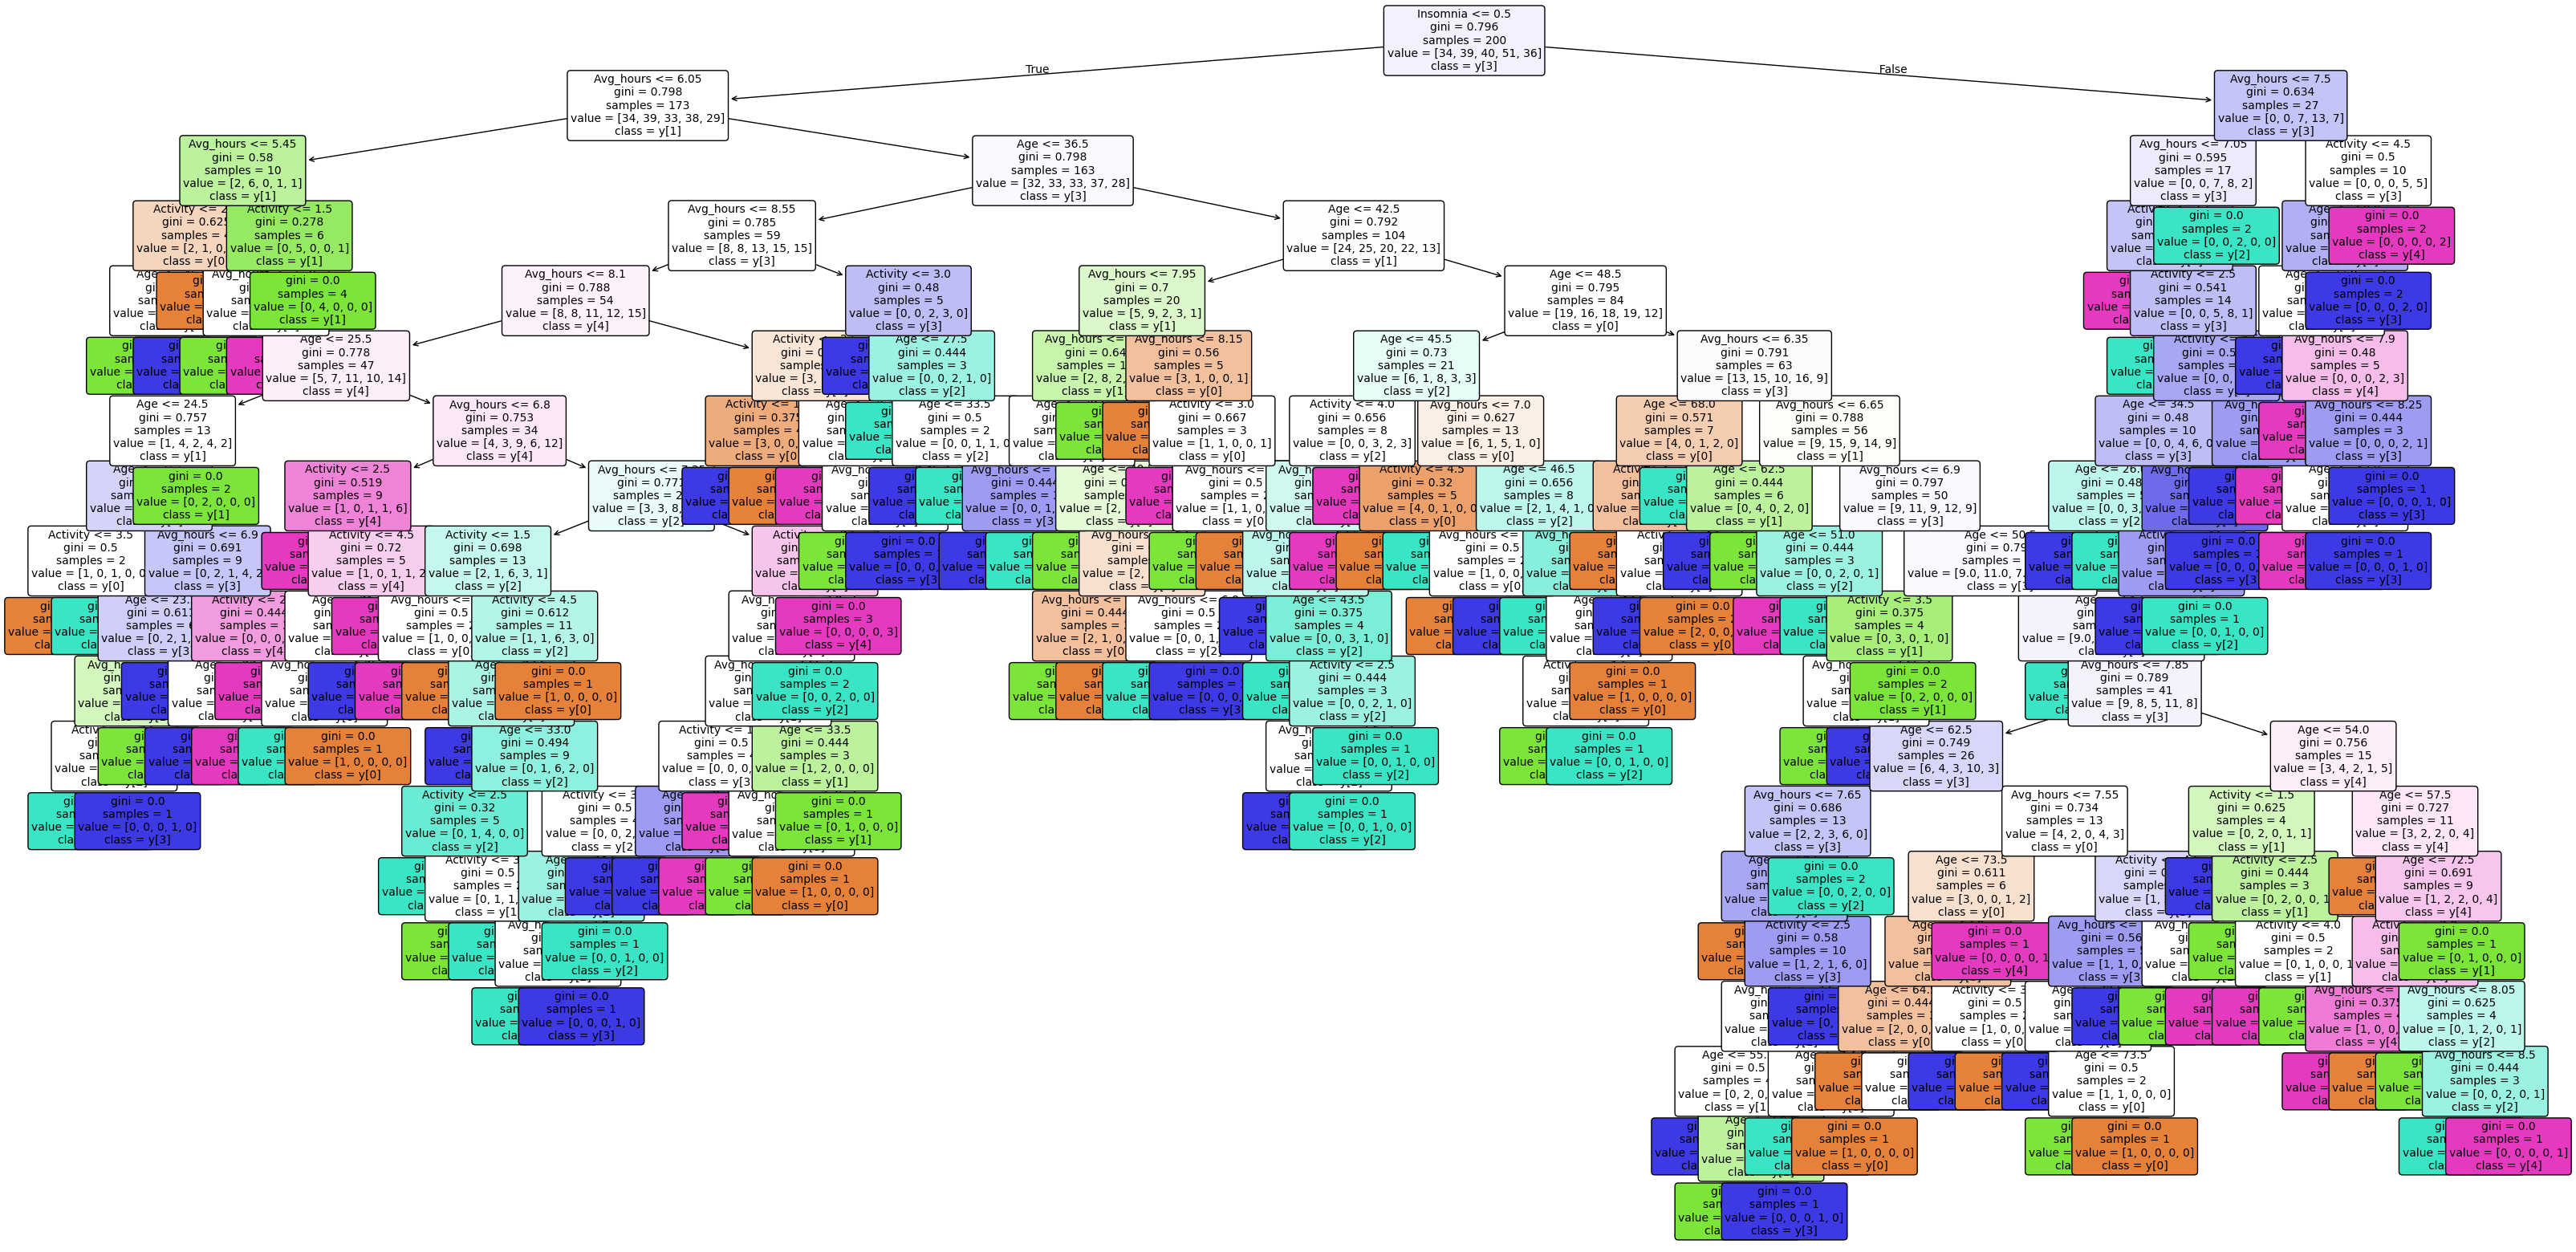

In [73]:
# Step 3: Plot the tree on a larger canvas
plt.figure(figsize=(40, 20))  # Large canvas to accommodate many nodes
plot_tree(
    default_tree,
    feature_names=X.columns,
    class_names=True,
    filled=True,
    rounded=True,
    fontsize=10
)

## Group Exercise Part 3 (20 mins)


Load the sleep data linked below.



In [60]:
#using pandas csv reader to load data from our github repo
link_to_file = "https://raw.githubusercontent.com/Center-for-Health-Data-Science/Python_part2/main/data/sleep.csv"

db_df = pd.read_csv(link_to_file)
db_df.head()

,Age,Stress,Activity,Avg_hours,Insomnia
0,63,1,1,7.1,0
1,42,2,4,8.2,0
2,33,4,4,6.7,0
3,35,4,3,6.0,1
4,39,2,2,7.9,0


For this exercise, assume the data is already clean.

Again, train a decision tree model with hyperparameters of your choice. Remember to split the data into test and training set. Then evaluate your model's performance (confusion matrix, precision, recall). What do you think of the performance?  Have a look at the distribution of your outcome variable. Discuss in your group why you get this result.



In [62]:
y = db_df['Stress']
X = db_df.drop(columns=['Stress'])

In [63]:
#import the function to produce the training and test sets
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [66]:
# Try a tuned tree
tree_model = DecisionTreeClassifier(
    criterion='entropy',        # or 'gini'
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=123
)

In [67]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=4, random_state=123)

In [68]:
y_pred = tree_model.predict(X_test)

In [69]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.22

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.08      0.17      0.11         6
           3       0.27      0.58      0.37        12
           4       0.40      0.20      0.27        10
           5       0.33      0.07      0.11        15

    accuracy                           0.22        50
   macro avg       0.22      0.20      0.17        50
weighted avg       0.25      0.22      0.19        50

